# **🌟Import the Depedencies**
*   pandas - making dataframes
*   matplotlib& seaborn - used to make graphs & plots
*   sklearn - to perform regression / classification
*   metrics - to identify outliers / errors etc.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# **🌟Data Collection**

## **⭐Reading Data**

In [2]:
df = pd.read_csv("/content/card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## **⭐ Data Analysis and EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


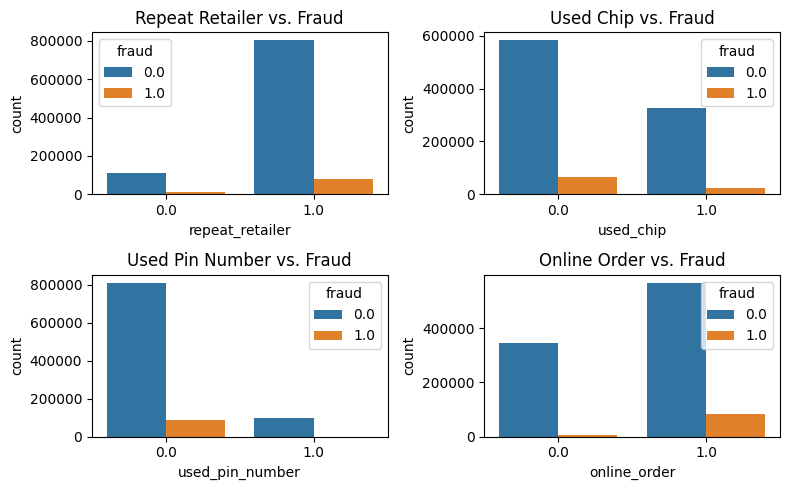

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a 2x2 grid of countplots
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

# Plot 1: repeat_retailer vs. fraud
sns.countplot(data=df, x='repeat_retailer', hue='fraud', ax=axes[0, 0])

# Plot 2: used_chip vs. fraud
sns.countplot(data=df, x='used_chip', hue='fraud', ax=axes[0, 1])

# Plot 3: used_pin_number vs. fraud
sns.countplot(data=df, x='used_pin_number', hue='fraud', ax=axes[1, 0])

# Plot 4: online_order vs. fraud
sns.countplot(data=df, x='online_order', hue='fraud', ax=axes[1, 1])

# Set titles for each plot
axes[0, 0].set_title('Repeat Retailer vs. Fraud')
axes[0, 1].set_title('Used Chip vs. Fraud')
axes[1, 0].set_title('Used Pin Number vs. Fraud')
axes[1, 1].set_title('Online Order vs. Fraud')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

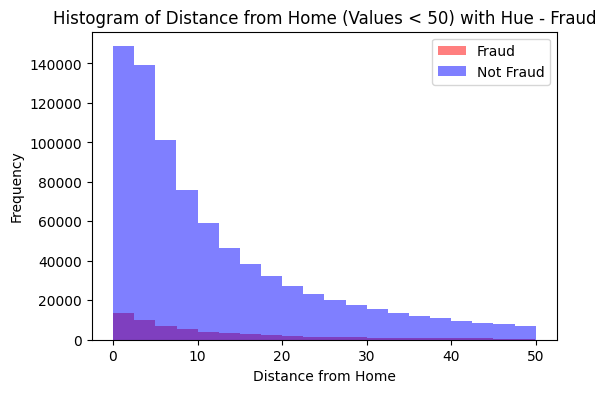

In [5]:
import matplotlib.pyplot as plt


# Filter data by fraud category and values less than 500
fraud_data = df[(df['fraud'] == 1) & (df['distance_from_home'] < 50)]['distance_from_home']
not_fraud_data = df[(df['fraud'] == 0) & (df['distance_from_home'] < 50)]['distance_from_home']

# Create a figure with a specified size
plt.figure(figsize=(6, 4))

# Create a histogram
plt.hist(fraud_data, bins=20, alpha=0.5, color='red', label='Fraud')
plt.hist(not_fraud_data, bins=20, alpha=0.5, color='blue', label='Not Fraud')

plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
plt.title('Histogram of Distance from Home (Values < 50) with Hue - Fraud')
plt.legend()

# Show the histogram
plt.show()

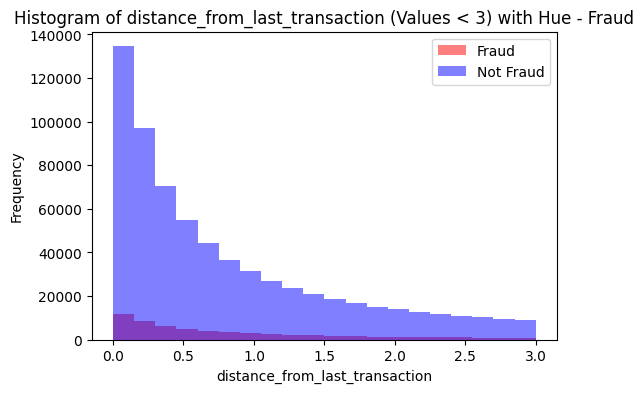

In [6]:
import matplotlib.pyplot as plt


# Filter data by fraud category and values less than 500
fraud_data = df[(df['fraud'] == 1) & (df['distance_from_last_transaction'] < 3)]['distance_from_last_transaction']
not_fraud_data = df[(df['fraud'] == 0) & (df['distance_from_last_transaction'] < 3)]['distance_from_last_transaction']

# Create a figure with a specified size
plt.figure(figsize=(6, 4))

# Create a histogram
plt.hist(fraud_data, bins=20, alpha=0.5, color='red', label='Fraud')
plt.hist(not_fraud_data, bins=20, alpha=0.5, color='blue', label='Not Fraud')

plt.xlabel('distance_from_last_transaction')
plt.ylabel('Frequency')
plt.title('Histogram of distance_from_last_transaction (Values < 3) with Hue - Fraud')
plt.legend()

# Show the histogram
plt.show()

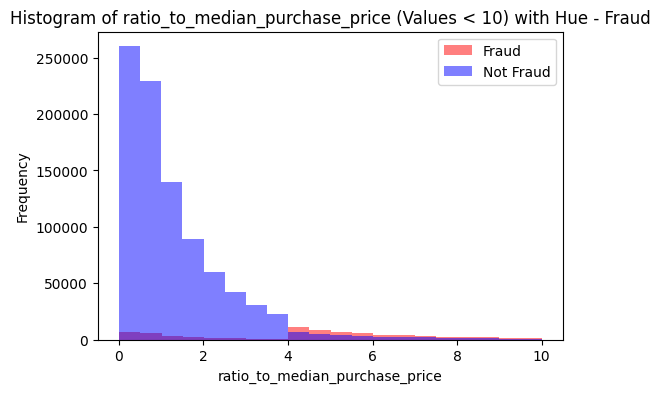

In [7]:
import matplotlib.pyplot as plt

# Filter data by fraud category and values less than 500
fraud_data = df[(df['fraud'] == 1) & (df['ratio_to_median_purchase_price'] < 10)]['ratio_to_median_purchase_price']
not_fraud_data = df[(df['fraud'] == 0) & (df['ratio_to_median_purchase_price'] < 10)]['ratio_to_median_purchase_price']

# Create a figure with a specified size
plt.figure(figsize=(6, 4))

# Create a histogram
plt.hist(fraud_data, bins=20, alpha=0.5, color='red', label='Fraud')
plt.hist(not_fraud_data, bins=20, alpha=0.5, color='blue', label='Not Fraud')

plt.xlabel('ratio_to_median_purchase_price')
plt.ylabel('Frequency')
plt.title('Histogram of ratio_to_median_purchase_price (Values < 10) with Hue - Fraud')
plt.legend()

# Show the histogram
plt.show()

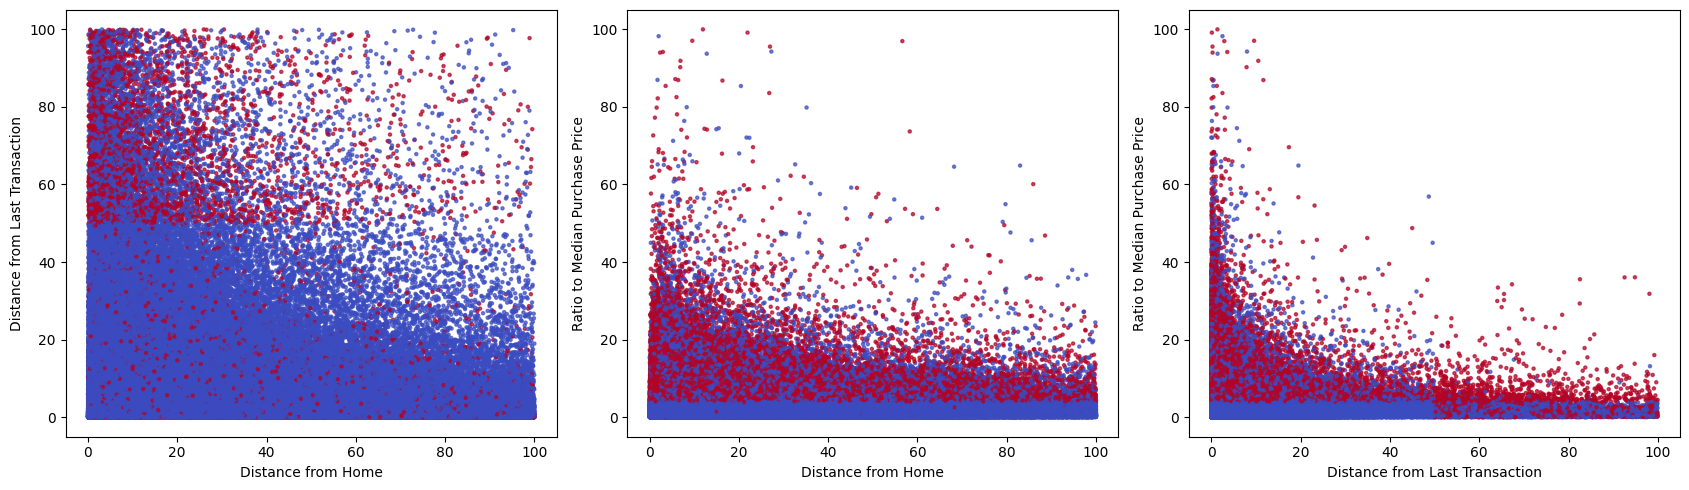

In [8]:
import matplotlib.pyplot as plt


# Filter data to include only values less than 30 for all three columns
filtered_data = df[(df['distance_from_home'] < 100) & (df['distance_from_last_transaction'] < 100) & (df['ratio_to_median_purchase_price'] < 100)]

# Create a 1x3 grid of scatterplots
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

# Scatterplot 1: distance_from_home vs. distance_from_last_transaction
axes[0].scatter(filtered_data['distance_from_home'], filtered_data['distance_from_last_transaction'], c=filtered_data['fraud'], cmap='coolwarm', alpha=0.7, s=5)
axes[0].set_xlabel('Distance from Home')
axes[0].set_ylabel('Distance from Last Transaction')
#axes[0].set_title('Distance from Home vs. Distance from Last Transaction')

# Scatterplot 2: distance_from_home vs. ratio_to_median_purchase_price
axes[1].scatter(filtered_data['distance_from_home'], filtered_data['ratio_to_median_purchase_price'], c=filtered_data['fraud'], cmap='coolwarm', alpha=0.7, s=5)
axes[1].set_xlabel('Distance from Home')
axes[1].set_ylabel('Ratio to Median Purchase Price')
#axes[1].set_title('Distance from Home vs. Ratio to Median Purchase Price')

# Scatterplot 3: distance_from_last_transaction vs. ratio_to_median_purchase_price
axes[2].scatter(filtered_data['distance_from_last_transaction'], filtered_data['ratio_to_median_purchase_price'], c=filtered_data['fraud'], cmap='coolwarm', alpha=0.7, s=5)
axes[2].set_xlabel('Distance from Last Transaction')
axes[2].set_ylabel('Ratio to Median Purchase Price')
#axes[2].set_title('Distance from Last Transaction vs. Ratio to Median Purchase Price')

# Adjust layout
plt.tight_layout()

# Show the scatterplots
plt.show()

## **⭐ Checking for Multicollinearity**

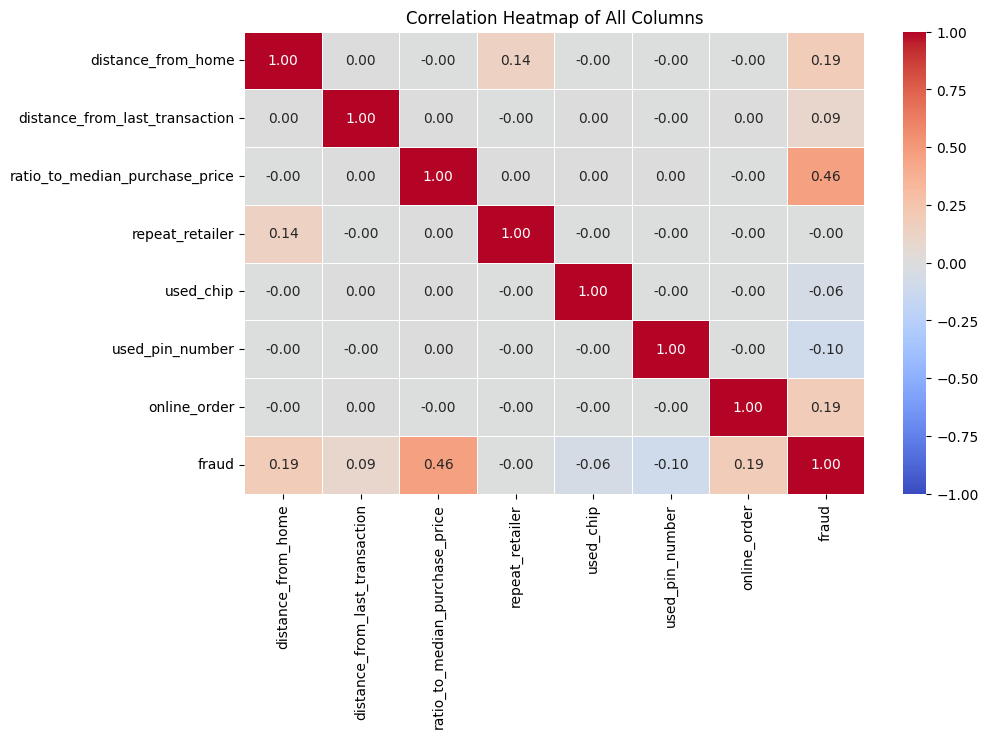

In [9]:
correlation_matrix = df.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, center=0, linewidths=0.5)

plt.title('Correlation Heatmap of All Columns')
plt.show()

As the correlation coefficient isn't more than 0.75 or less than -0.75, we dont need concern over correlation issues.

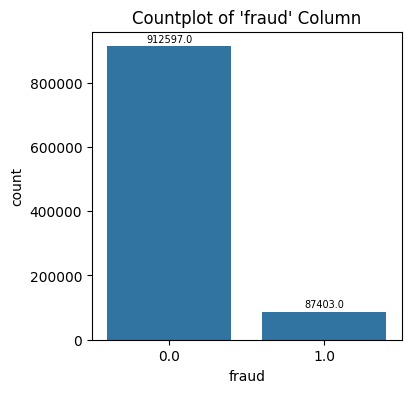

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt



# Create a countplot of the "fraud" column
plt.figure(figsize=(4, 4))
ax = sns.countplot(data=df, x="fraud")

plt.title("Countplot of 'fraud' Column")

# Annotate the bars with count values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=7, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

# **🌟 Model Selection & Evaluation**

## **⭐ Random Forest Regression**

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into train and test sets with a similar target distribution
X = df.drop('fraud', axis=1)  # Features
y = df['fraud']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on both the training and test sets
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model and show classification reports and confusion matrices
def evaluate_model(y_true, y_pred, set_name):
    report = classification_report(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)
    print(f"Classification Report for {set_name}:\n{report}")
    print(f"Confusion Matrix for {set_name}:\n{matrix}\n")

# Evaluate on the training data
evaluate_model(y_train, y_train_pred, "Training Data")

# Evaluate on the test data
evaluate_model(y_test, y_test_pred, "Test Data")

Classification Report for Training Data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    638818
         1.0       1.00      1.00      1.00     61182

    accuracy                           1.00    700000
   macro avg       1.00      1.00      1.00    700000
weighted avg       1.00      1.00      1.00    700000

Confusion Matrix for Training Data:
[[638818      0]
 [     0  61182]]

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273779
         1.0       1.00      1.00      1.00     26221

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000

Confusion Matrix for Test Data:
[[273779      0]
 [     5  26216]]



## **⭐ XGBoost**

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix


# Train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Make predictions on both the training and test sets
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

# Evaluate the model and show classification reports and confusion matrices
def evaluate_model(y_true, y_pred, set_name):
    report = classification_report(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)
    print(f"Classification Report for {set_name}:\n{report}")
    print(f"Confusion Matrix for {set_name}:\n{matrix}\n")

# Evaluate on the training data
evaluate_model(y_train, y_train_pred, "Training Data")

# Evaluate on the test data
evaluate_model(y_test, y_test_pred, "Test Data")

Classification Report for Training Data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    638818
         1.0       0.99      1.00      0.99     61182

    accuracy                           1.00    700000
   macro avg       1.00      1.00      1.00    700000
weighted avg       1.00      1.00      1.00    700000

Confusion Matrix for Training Data:
[[638444    374]
 [   258  60924]]

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273779
         1.0       0.99      0.99      0.99     26221

    accuracy                           1.00    300000
   macro avg       0.99      1.00      0.99    300000
weighted avg       1.00      1.00      1.00    300000

Confusion Matrix for Test Data:
[[273514    265]
 [   226  25995]]



# **🌟 Project Conclusion**

As XGBoost and Random forest give the same and best amount of precision and better score, we can use this model for prediction of Credit Card Fraud Detection